# Titanic Dataset Exploratory Data Analysis (EDA) and Visualization

This notebook performs an exploratory data analysis (EDA) on the Titanic dataset to understand its structure, identify patterns, and uncover insights that may inform predictive modeling. The dataset contains information about passengers aboard the Titanic, including their demographics, ticket details, and survival status.

In [ ]:
# importing important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Titanic Dataset

The dataset is loaded from a CSV file (`Titanic-Dataset.csv`) into a pandas DataFrame for analysis.

In [2]:
ds = pd.read_csv("Titanic-Dataset.csv")

## Previewing the Dataset

The following cell displays the first five rows of the dataset to provide an initial look at its structure and contents.

In [3]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking for Missing Values

This cell checks for missing values in each column, returning boolean values (`True` for missing, `False` for non-missing).

In [5]:
ds.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Visualizing Missing Values

The heatmap below visualizes missing values in the dataset:
- `Cabin` has the most missing values, followed by `Age` and a few in `Embarked`.

<Axes: >

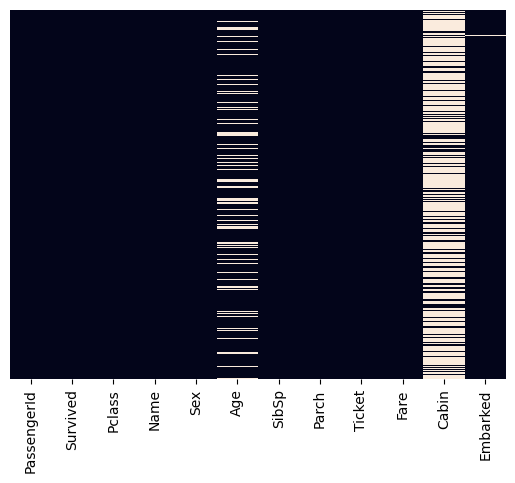

In [6]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

# Replacing Missing Values

In the below cells the missing values are imputed:
- In `Age` column the missing values are imputed by median.
- In `Embarked` column the missing values are imputed by mode.
- The `Cabin` was dropped as it had a lot of missing values.

In [7]:
ds['Age'] = ds['Age'].fillna(ds['Age'].median())

In [8]:
ds['Embarked'] = ds['Embarked'].fillna(ds['Embarked'].mode()[0])

In [9]:
ds.drop(columns=['Cabin'], inplace=True)

### Again Visualizing Missing Values

The heatmap below visualizes missing values in the dataset and it is clear that no missing values are left.

<Axes: >

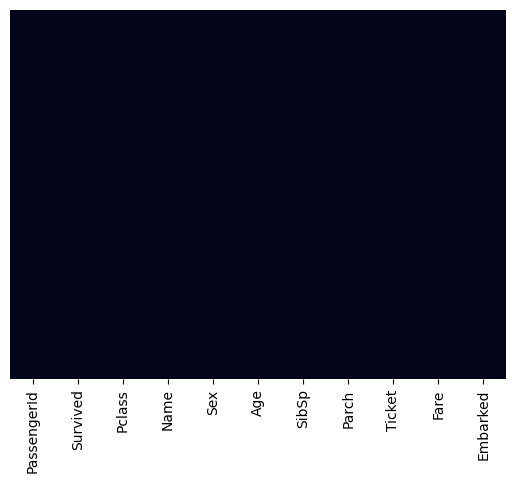

In [10]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

# Checking Duplicate Values

No duplicate values are found in the dataset.

In [11]:
print(ds.duplicated().sum())

0


In [12]:
ds.drop_duplicates(inplace=True)

In [18]:
print(ds.duplicated().sum())

0


# Visualizing Outliers in Fare Column (Before Replacing)

- The outliers are visualized using boxplot as it tells about outliers and skewness in the dataset.

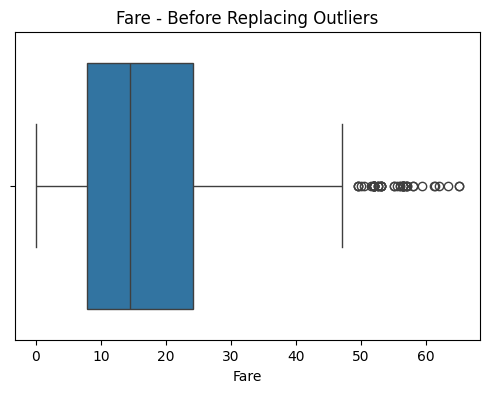

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=ds['Fare'])
plt.title("Fare - Before Replacing Outliers")
plt.show()

# Replacing the Outliers

- The outliers in the `Fare` column are identitfied by using IQR method.
- Then they are replaced by median of values.
- The outliers are visualized again after replacemnet.

No. of Outliers in Fare(Before Replacing): 34


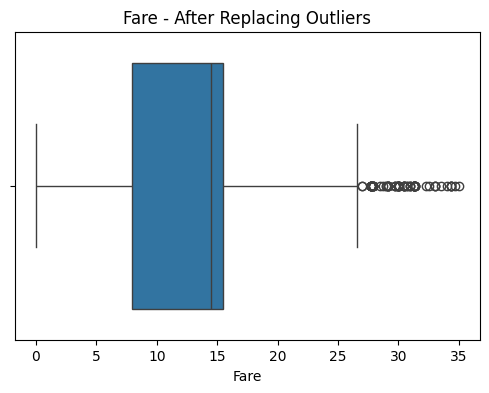

No. of Outliers in Fare(After Replacing): 0


In [36]:
Q1 = ds['Fare'].quantile(0.25)
Q3 = ds['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ds[(ds['Fare'] < lower_bound) | (ds['Fare'] > upper_bound)]
count = len(outliers)
print("No. of Outliers in Fare(Before Replacing):",count)


fare_median = ds['Fare'].median()
ds.loc[(ds['Fare'] < lower_bound) | (ds['Fare'] > upper_bound), 'Fare'] = fare_median

plt.figure(figsize=(6, 4))
sns.boxplot(x=ds['Fare'])
plt.title("Fare - After Replacing Outliers")
plt.show()


outliers = ds[(ds['Fare'] < lower_bound) | (ds['Fare'] > upper_bound)]
count = len(outliers)
print("No. of Outliers in Fare(After Replacing):",count)

# Visualizing Categorical Variables Using Bar Chart

- Columns `Sex`, `Pclass`, `Embarked` and `Survived` are visualized.
- Bar Chart tells us the distribution of values in each column. For e.g: How many male/females were present on the ship.

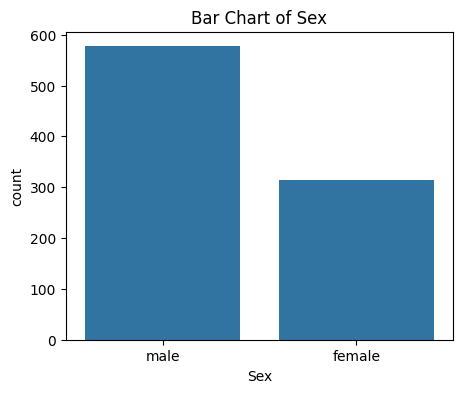

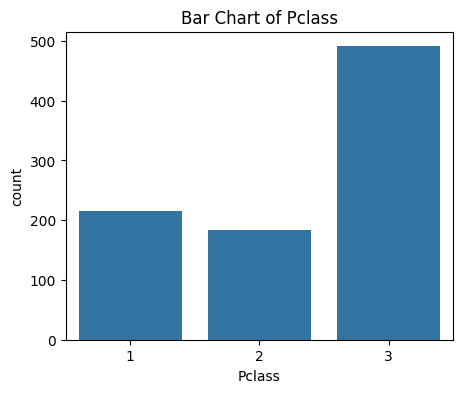

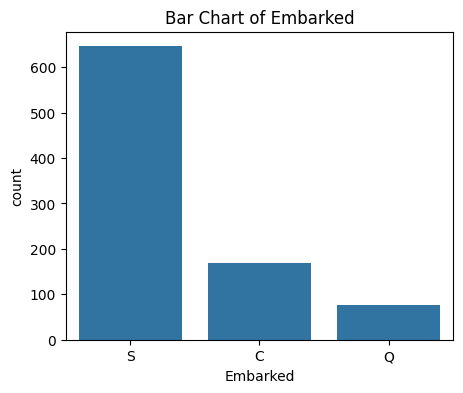

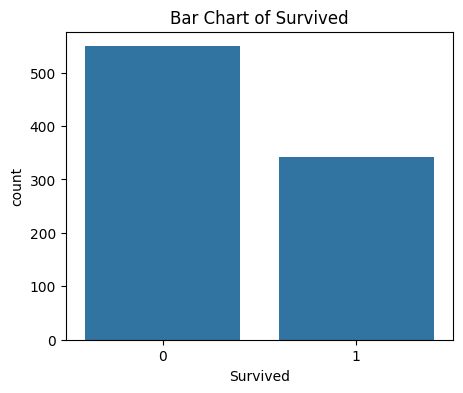

In [24]:
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']

for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=ds, x=col)
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.show()

# Visualizing Numerical Variables Using Histogram

- Columns `Age`, `Fare`, `SibSp` and `Parch` are visualized.
- Histogram tells numeric distribution of data in form of bars.
- KDE(Kernal Density Estimation) represents the data using a continuous smooth curve.
- Bins tells us how many bars a histogram has.

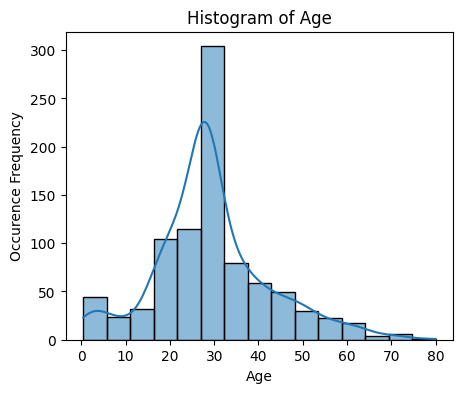

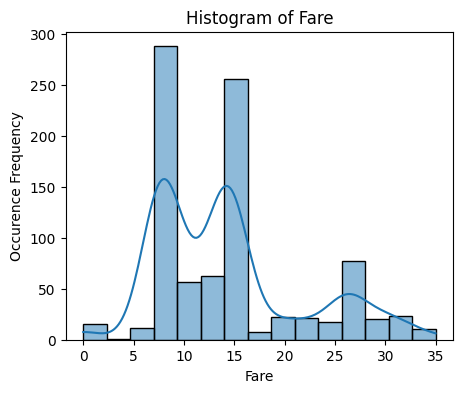

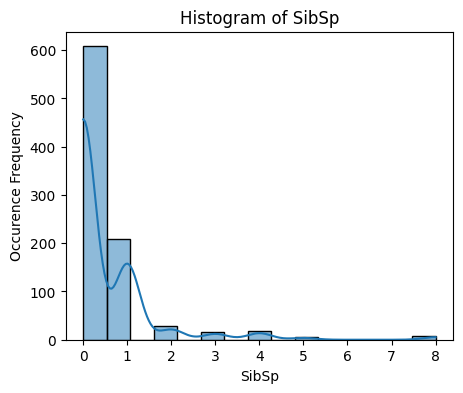

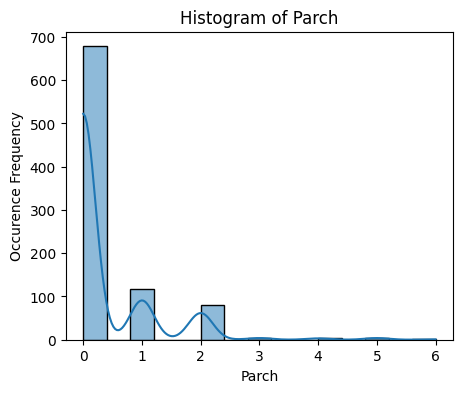

In [41]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(data=ds, x=col, kde=True, bins=15)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Occurence Frequency")
    plt.show()

# Correlation Heatmap of Numeric Values

It tells how strongly each pair of numeric variables(columns) in dataset are correlated.

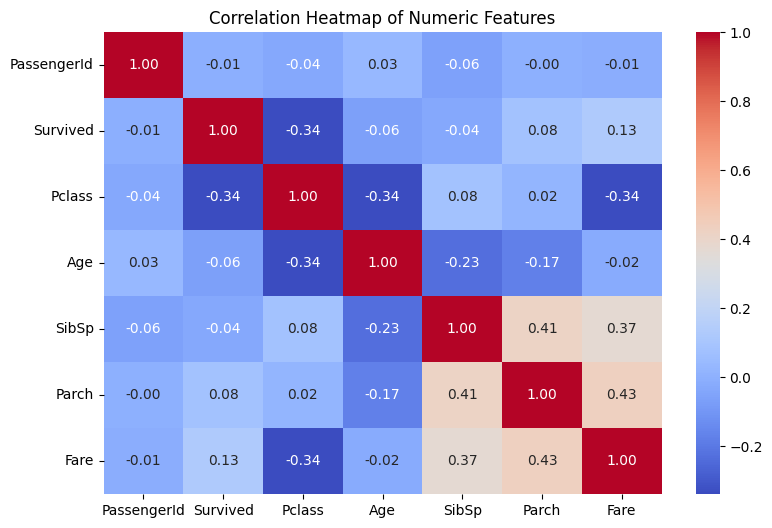

In [34]:
numeric_ds = ds.select_dtypes(include='number')
corr = numeric_ds.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 📊 **Summary & Insights from Titanic Dataset (Task 1)**

### 🔹 1. **Missing Values**
- `Age`, `Cabin`, and `Embarked` had missing values.
- `Age` was imputed with the **median**.
- `Embarked` was imputed with the **mode**.
- `Cabin` was dropped due to excessive missing data.

---

### 🔹 2. **Duplicates**
- Duplicate rows were checked and removed to ensure data quality.

---

### 🔹 3. **Outliers**
- Outliers were identified in `Fare` using the **IQR method**.
- These outliers were **replaced with the median** to retain data structure.
- Boxplots confirmed a cleaner distribution after replacement.

---

### 🔹 4. **Categorical Variable Insights (Bar Charts)**
- **Sex**: More males than females on board.
- **Pclass**: Most passengers were in **3rd class**, indicating affordability.
- **Embarked**: Majority embarked from **Southampton ('S')**.
- **Survived**: Survival rate was less than 50%.

---

### 🔹 5. **Numerical Variable Insights (Histograms)**
- **Age**: Most passengers were **young adults** (20–30 range).
- **Fare**: Skewed right with many low fares and a few very high ones.
- **SibSp** and **Parch**: Most people traveled **alone or with one relative**.

---

### 🔹 6. **Correlation Heatmap**
- **Fare** had a **negative correlation** with `Pclass` (higher class → higher fare).
- **SibSp** and `Parch` had a **positive correlation** (traveling with family).
- **Survived** showed:
  - **Positive correlation** with `Fare` → those who paid more had higher survival.
  - **Negative correlation** with `Pclass` → passengers in 1st class had better survival chances.

---

## ✅ **Conclusion**
- Women and 1st-class passengers had better survival rates.
- Most travelers were in 3rd class and younger age groups.
- Data cleaning significantly improved data quality for further analysis or modeling.